In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df_ind = df[df['job_country'] == 'India'].dropna(subset=['salary_year_avg'])

In [3]:
job_titles = df_ind['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [4]:
df_ind_top6 = df_ind[df_ind['job_title_short'].isin(job_titles)]

In [8]:
job_order = df_ind_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

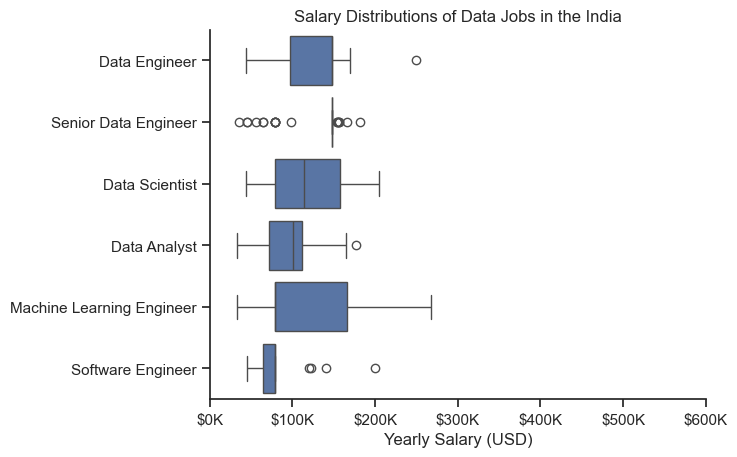

In [9]:
sns.boxplot(data=df_ind_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in the India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()